In [1]:
import einops
import numpy as np

In [11]:
# Helper function. Can be ignored. Taken from: https://github.com/arogozhnikov/einops/blob/main/docs/utils/__init__.py
def display_np_arrays_as_images():
    import IPython
    import PIL.Image
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return PIL.Image.fromarray(np.array(np.clip(a, 0, 1) * 255, dtype="uint8"))._repr_png_()
        else:
            return PIL.Image.fromarray(np.zeros([1, 1], dtype="uint8"))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print(f"<array of shape {obj.shape}>")

    IPython.get_ipython().display_formatter.formatters["image/png"].for_type(np.ndarray, np_to_png)
    IPython.get_ipython().display_formatter.formatters["text/plain"].for_type(np.ndarray, np_to_text)

display_np_arrays_as_images()

### Load Some test images

In [7]:
images = np.load("./test_images.npy", allow_pickle=False)
print(images.shape, images.dtype) 

(6, 96, 96, 3) float64


Thus, 6 images of shape 96, 96 with 3 channels are loaded.

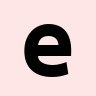

In [15]:
images[0]

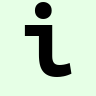

In [16]:
images[1]

#### Rearrange example

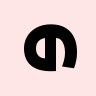

In [17]:
einops.rearrange(images[0], "h w c -> w h c")

In [20]:
print(einops.rearrange(np.arange(12).reshape(3,4), "h w -> w h"))

[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


#### Composition of axes with `rearrange`

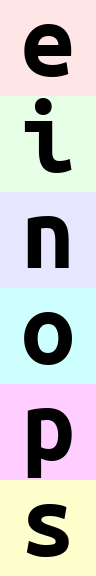

In [21]:
# Create a single image with height 6 * 96
einops.rearrange(images, "b h w c -> (b h) w c")

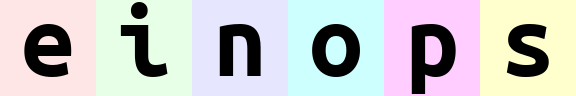

In [22]:
# Create a new image with width 6 * 96
einops.rearrange(images, "b h w c -> h (b w) c")

#### Decomposition of axes with `rearrange`

Represent an axis as the combination of new axes

In [23]:
einops.rearrange(images, "(b1 b2) h w c -> b1 b2 h w c", b1=2).shape

(2, 3, 96, 96, 3)

A combination of decomposition and composition of axes.

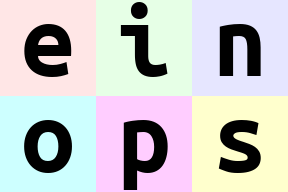

In [24]:
einops.rearrange(images, "(b1 b2) h w c -> (b1 h) (b2 w) c", b1=2)

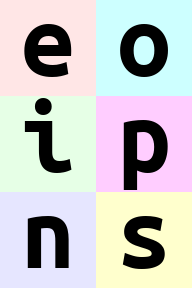

In [32]:
einops.rearrange(images, "(b1 b2) h w c -> (b2 h) (b1 w) c", b1=2)

#### `reduce`

In [38]:
X = np.arange(12).reshape(3, 4).astype(np.float32)
print(X)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


Compute the mean of each column.

In [39]:
einops.reduce(X, "rows cols -> cols", reduction="mean")

array([4., 5., 6., 7.], dtype=float32)
<array of shape (4,)>


Compute the mean of each row.

In [40]:
einops.reduce(X, "rows cols -> rows", reduction="mean")

array([1.5, 5.5, 9.5], dtype=float32)
<array of shape (3,)>


In [51]:
# Keep dimensions 
einops.reduce(X, "rows cols -> rows 1", reduction="mean").shape

(3, 1)

In [42]:
# Mean over all elements
einops.reduce(X, "rows cols -> ", reduction="mean")

5.5

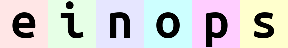

In [44]:
# Max pooling over 2*2 window and rearranging
einops.reduce(images, "b (h h2) (w w2) c -> h (b w) c", "max", h2=2, w2=2)

In [46]:
# Stride is equal to window size
einops.reduce(images, "b (h h2) (w w2) c -> b h w c", "max", h2=2, w2=2).shape

(6, 48, 48, 3)

#### `repeat`

In [52]:
X = np.arange(4)
print(X)

[0 1 2 3]


In [53]:
print(einops.repeat(X, "w -> h w", h = 4))

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]


In [54]:
# Shortcut and different placement of new axis
print(einops.repeat(X, "w -> w 3"))

[[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]]


In [56]:
X = np.arange(4).reshape(2, 2)
print(X)
print(einops.repeat(X, "h w -> h (2 w)"))

[[0 1]
 [2 3]]
[[0 1 0 1]
 [2 3 2 3]]


Order of the axes matters. Repeat each element two times.

In [57]:
print(einops.repeat(X, "h w -> h (w 2)"))

[[0 0 1 1]
 [2 2 3 3]]
